In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()

import cityiq


try:
    from pandas import json_normalize
except ImportError:
    from pandas.io.json import json_normalize


In [2]:
c = cityiq.CityIq()
c.config.which

'/Users/eric/.city-iq.yaml'

In [3]:
len(c.assets) # Will be slow the first time

21159

In [4]:
len(c.locations) 

5506

In [87]:
tasks = c.make_tasks(DownloadDataframeTask, assets, events, '2020-01-01', 'now') # Generate download tasks, 1 per asset/day/event type


In [89]:
for t in tasks[:10]:
    print()

10

In [57]:
# Get all BICYCLE events for this year. 
# This will produce about 33K download tasks, and take around 20 minutes to download. 
# for the first run. The first run will cache requests, so subsequent runs will be faster. 

from cityiq.task import DownloadDataframeTask

events = ['BICYCLE'] # '['PKIN', 'PKOUT']

assets = list(c.assets_by_event(events)) # Get all assets that have the Bicycle event

tasks = c.make_tasks(DownloadDataframeTask, assets, events, '2020-01-01', 'now') # Generate download tasks, 1 per asset/day/event type

frames = [result for task, result in c.run_async(tasks, workers=5)]

df = pd.concat(frames)
        
df.head()

df['timestamp'] = pd.to_datetime(df.timestamp, unit='ms')



100%|██████████| 33596/33596 [46:31<00:00, 12.03it/s]  


In [58]:
len(df) 

36081128

In [59]:
df.head().T

,0,1,2,3,4
locationUid,6f911c58,6f911c58,6f911c58,6f911c58,6f911c58
assetUid,000223ee-a868-474b-abcb-12ff1bad00a3,000223ee-a868-474b-abcb-12ff1bad00a3,000223ee-a868-474b-abcb-12ff1bad00a3,000223ee-a868-474b-abcb-12ff1bad00a3,000223ee-a868-474b-abcb-12ff1bad00a3
eventType,BICYCLE,BICYCLE,BICYCLE,BICYCLE,BICYCLE
timestamp,2020-01-01 08:00:18.740000,2020-01-01 08:00:48.863000,2020-01-01 08:01:19.054000,2020-01-01 08:01:49.178000,2020-01-01 08:02:19.236000
properties.directionUnit,DEGREE,DEGREE,DEGREE,DEGREE,DEGREE
properties.speedUnit,METERS_PER_SEC,METERS_PER_SEC,METERS_PER_SEC,METERS_PER_SEC,METERS_PER_SEC
properties.eventUid,MTU3Nzg2NTYxODc0MA==,MTU3Nzg2NTY0ODg2Mw==,MTU3Nzg2NTY3OTA1NA==,MTU3Nzg2NTcwOTE3OA==,MTU3Nzg2NTczOTIzNg==
measures.bicycleCount,0,0,0,0,0
measures.counter_direction_speed,0,0,0,0,0
measures.counter_direction_bicycleCount,0,0,0,0,0


In [60]:
%%time
t = df[['timestamp', 'locationUid', 'measures.counter_direction_bicycleCount','measures.bicycleCount']]\
    .set_index('timestamp').groupby(['locationUid',pd.Grouper(freq='15T')]).sum().reset_index()
t.columns = ['locationUid', 'timestamp', 'bike_count_counter', 'bike_count']

CPU times: user 32.9 s, sys: 7.7 s, total: 40.6 s
Wall time: 40 s


In [61]:
t['bc'] = t.bike_count_counter + t.bike_count_counter
t.head()

,locationUid,timestamp,bike_count_counter,bike_count,bc
0,02xg5jh1xlok9epmk9p,2020-04-27 08:00:00,0.0,0.0,0.0
1,02xg5jh1xlok9epmk9p,2020-04-27 08:15:00,0.0,0.0,0.0
2,02xg5jh1xlok9epmk9p,2020-04-27 08:30:00,0.0,0.0,0.0
3,02xg5jh1xlok9epmk9p,2020-04-27 08:45:00,0.0,0.0,0.0
4,02xg5jh1xlok9epmk9p,2020-04-27 09:00:00,0.0,0.0,0.0


In [71]:
t.groupby('locationUid').bc.sum().sort_values(ascending=False).head(30)

locationUid
ndy4qdunwwmk1mhv26k    121718.0
gpeyg1wws5k5pn1u77      69220.0
ncfxzd1llpmk9xdgen3     48758.0
9zrvpze6rdak5pm675u     46024.0
vt0y5k4kir8k9xdtxgg     33534.0
3vsltlvw15hk9ylwg58     32020.0
y68o96ujwxk1toq4lv      30590.0
8vikpt3t85gk0prbgn4     29692.0
vdkkfvwn3ilk9xdeua7     27222.0
ugrnbf7l6ugk5fofzww     24510.0
k6b8pzynvsjjx0tcewo     23346.0
dztp9uvkj2jxuqy90f      19426.0
b7gv7mosiuk1tr3t6i      16432.0
wp46rajhb8wk76izevd     14800.0
aunu3m2bqfljxwa78tw     14192.0
yn842tqhe4mk5fqcbys     12214.0
bsgp82u7jgijxxa0sag     11122.0
tjnvqozncabk5fowauo     10718.0
5ieth7v1hlnk5fqm8va      9450.0
zdqar876mjsk5ft1549      9084.0
vvtvrs83wfpk1mjha3i      8908.0
leyr7squ43sk5fozkgd      7016.0
1yhb03rnillk5fonl0n      6968.0
0d4dy6a06bpk5fqkqn9      6682.0
vjxh0si0gdrk76ha0bl      6466.0
aunrnlgxstgk5fsv2mq      6142.0
5ot2ikmmq9ik5pjqq17      5854.0
mqjg20ge6hjk9x9beky      5654.0
x58xtf59n4qk5fnv0h3      5536.0
xx4x7o00c4mk5fo4but      4936.0
Name: bc, dtype: float64

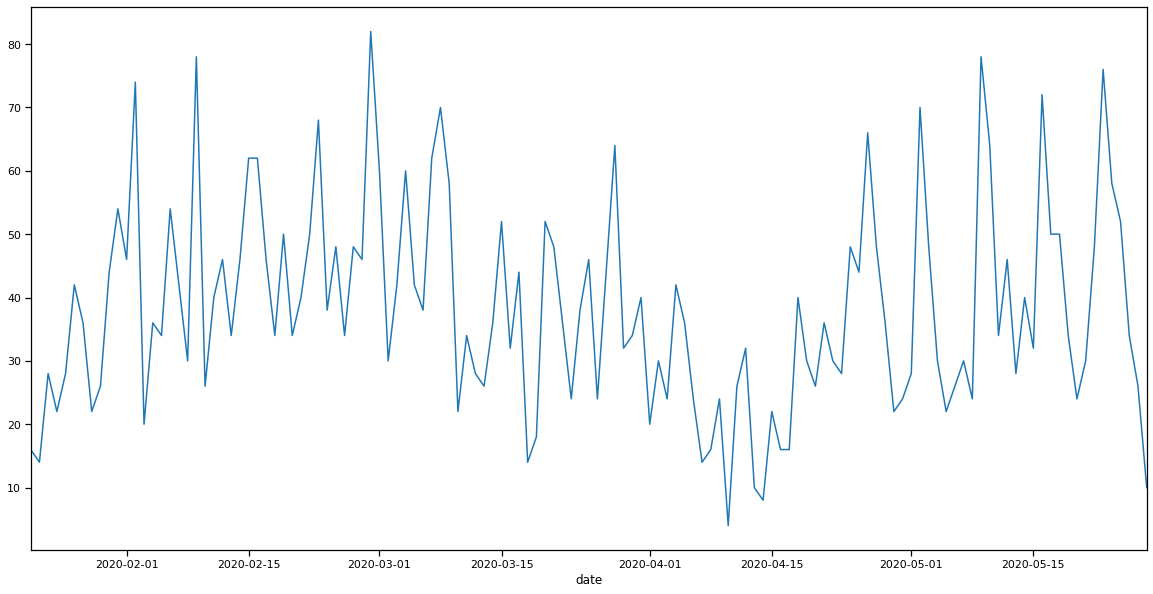

In [72]:
fig, ax = plt.subplots(figsize=(20,10))  

tl = t[t.locationUid == 'xx4x7o00c4mk5fo4but'].copy()
tl['time'] = tl.timestamp.dt.time
tl['date'] = tl.timestamp.dt.date
tl = tl.groupby('date').sum()
tl.bc.plot(ax=ax)

In [73]:
%%time
td = df[['timestamp', 'locationUid', 'measures.counter_direction_bicycleCount','measures.bicycleCount']]\
    .set_index('timestamp').groupby(['locationUid',pd.Grouper(freq='D')]).sum().reset_index()
td.columns = ['locationUid', 'timestamp', 'bike_count_counter', 'bike_count']
len(td)

CPU times: user 18.5 s, sys: 1.58 s, total: 20.1 s
Wall time: 18.4 s


In [85]:
td.groupby('locationUid').bc.sum().sort_values(ascending=False).head(20)

locationUid
ndy4qdunwwmk1mhv26k    121718.0
gpeyg1wws5k5pn1u77      69220.0
ncfxzd1llpmk9xdgen3     48758.0
9zrvpze6rdak5pm675u     46024.0
vt0y5k4kir8k9xdtxgg     33534.0
3vsltlvw15hk9ylwg58     32020.0
y68o96ujwxk1toq4lv      30590.0
8vikpt3t85gk0prbgn4     29692.0
vdkkfvwn3ilk9xdeua7     27222.0
ugrnbf7l6ugk5fofzww     24510.0
k6b8pzynvsjjx0tcewo     23346.0
dztp9uvkj2jxuqy90f      19426.0
b7gv7mosiuk1tr3t6i      16432.0
wp46rajhb8wk76izevd     14800.0
aunu3m2bqfljxwa78tw     14192.0
yn842tqhe4mk5fqcbys     12214.0
bsgp82u7jgijxxa0sag     11122.0
tjnvqozncabk5fowauo     10718.0
5ieth7v1hlnk5fqm8va      9450.0
zdqar876mjsk5ft1549      9084.0
Name: bc, dtype: float64

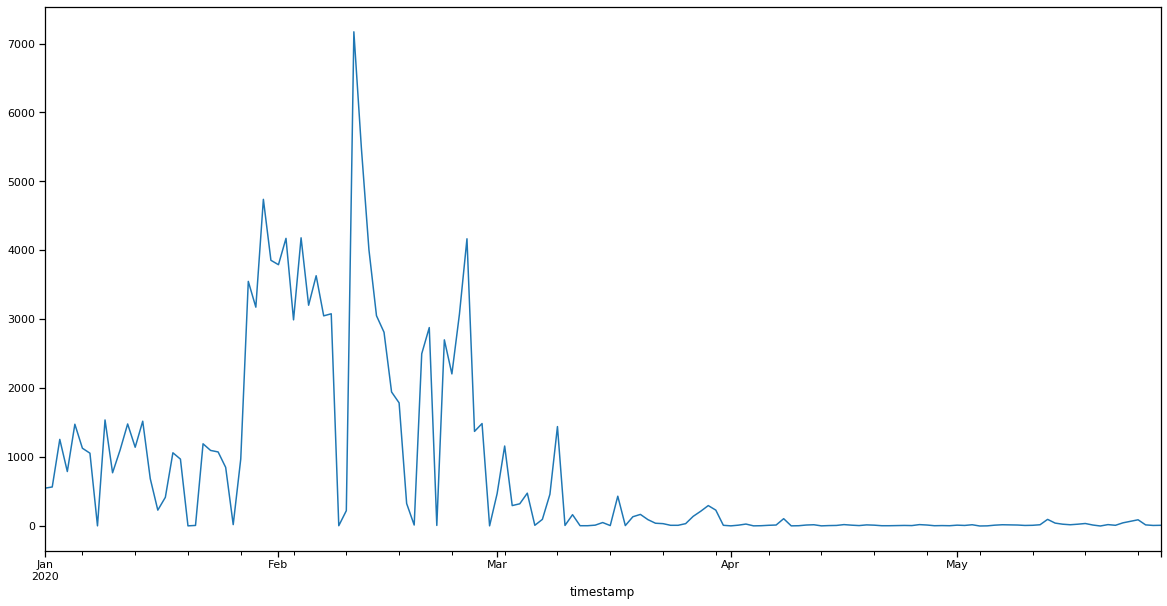

In [86]:
fig, ax = plt.subplots(figsize=(20,10))  
td['bc'] = td.bike_count_counter + td.bike_count_counter
tl = td[td.locationUid == 'ndy4qdunwwmk1mhv26k'].set_index('timestamp').copy()
tl.bc.plot(ax=ax)

In [2]:
import cityiq
from datetime import date, datetime 
c = cityiq.CityIq()

In [4]:
datetime.min.time()

datetime.time(0, 0)